<a href="https://colab.research.google.com/github/franzis17/EnronEmailAnalysis/blob/main/Business_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Introduction</b>

The Enron Corporation is a company based in America that provides energy, services, and commodity. Due to fraudulent accounting practices and financial scandals, Enron is notorious for corporate fraud and was exposed in 2001. This report aims to identify potential topics of interest in relation to the fraudulent activities that Enron did by analysing the volume of email over time, Top 20 email senders and email receivers, and analysing email subject keywords.

# <b>Importing Packages and Connecting to the Database</b>

IMPORTANT: Must run first before running any analysis


## Initialise all packages needed in the program

Packages used:
* calendar --> for showing the month name in Analysis 1 instead of the number of the month
* matplotlib --> for visualisation purposes. Plot the data in to some kind of a chart.
* pandas --> for efficiently sorting different kinds of data (i.e. sorting messages data in a monthly order)
* sqlite3 --> for extracting data in the database and perform 3 different kinds of analysis on the data



In [1]:
import calendar
import matplotlib.pyplot as plt
import pandas as pd
import re  # regular expression
import sqlite3
from wordcloud import WordCloud

# Generate Stopwords
from google.colab import output
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/stopwords.py
output.clear()
print("Required packages installed")

Required packages installed


## Connect to the database

In [2]:
# Connect to the database using 'sqlite3'
conn = sqlite3.connect('/content/drive/MyDrive/a-quick_uploads/enron.db')

# Create a cursor to navigate each rows in the database and query any specific data from the dataset
cur = conn.cursor()

# Functions

* MUST run the following functions before any analysis.
* The functions below acts as modules used by multiple analysis methods to decrease code repetition.

In [3]:
def query_db(table_name):
    sql='''
    SELECT * FROM {}
    '''.format(table_name)
    return pd.read_sql(sql, conn)

def query_db_for_messages():
    return query_db('message')

def query_db_for_employees():
    return query_db('employeelist')

def query_db_for_recipients():
    return query_db('recipientinfo')

# <u>**Analysis 1.**</u> Email Traffic Over Time

Aim: Analyze the volume of emails sent over time by counting the number of messages of each employees sent per month.

## <b>Total number of emails sent per year</b>

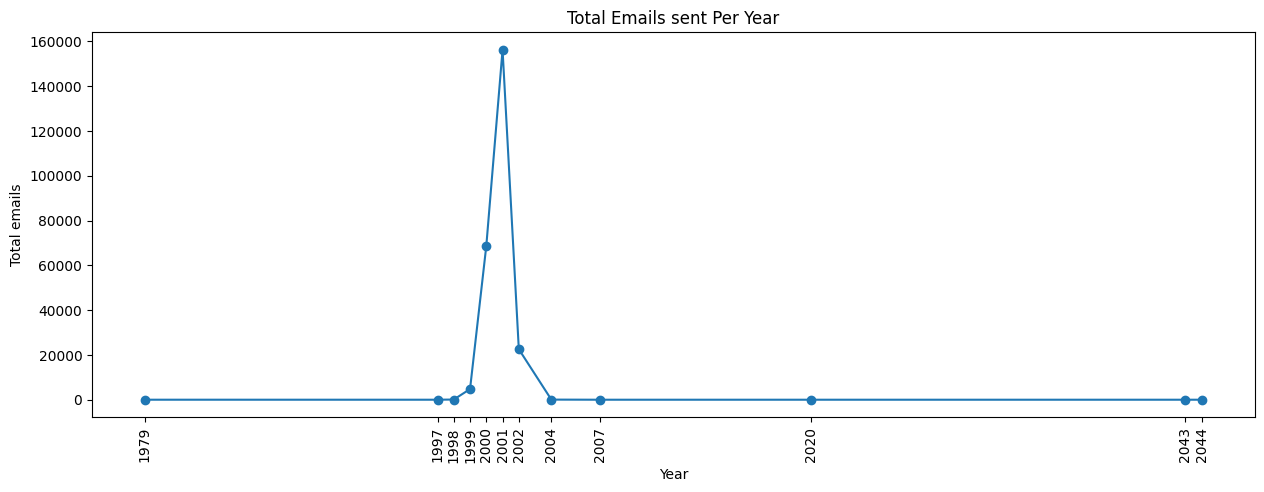

In [6]:
'''
Note:
> Lines 13 to 20 were generated by ChatGPT. More info on reference list [ChatGPT-1]
'''

messages_df = query_db_for_messages()

# Make a new year table to sort the total number of messages by year
messages_df['date'] = pd.to_datetime(messages_df['date'], errors='coerce')
messages_df['year'] = messages_df['date'].dt.year
messages_per_year = messages_df.groupby('year').size()

# Plot the total number of messages per year
plt.figure(figsize=(15,5))
messages_per_year.plot(kind='line', marker='o')
plt.xticks(messages_per_year.index, rotation=90)
plt.xlabel('Year')
plt.ylabel('Total emails')
plt.title('Total Emails sent Per Year')
plt.show()

## <b>Total number of emails sent per month in the year 2001</b>

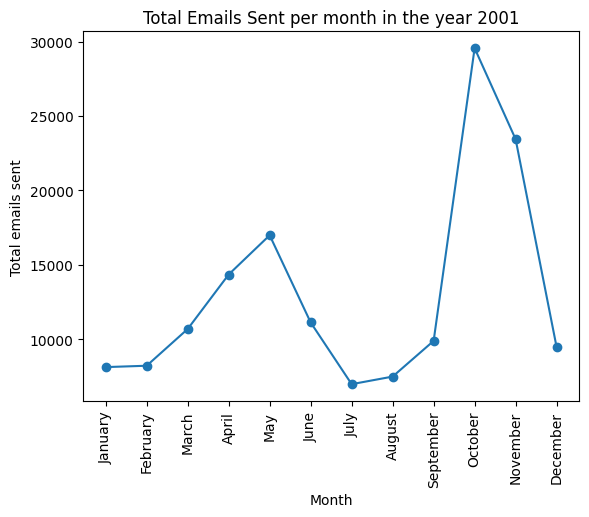

In [8]:
'''
Note:
  > Lines 8 to 29 were generated by ChatGPT. More info on reference list - ChatGPT[3]
'''

messages_df = query_db_for_messages()

date_df = pd.DataFrame()
year_2001_df = pd.DataFrame()

messages_df['date'] = pd.to_datetime(messages_df['date'], errors='coerce')

year_2001_df = messages_df[(messages_df['date'].dt.year == 2001)]

messages_per_month = year_2001_df.groupby(year_2001_df['date'].dt.month).size()

# Get the month names corresponding to the month numbers
month_names = [calendar.month_name[month_num] for month_num in messages_per_month.index]

# Create a line chart showing the messages per month
messages_per_month.plot(kind='line', marker='o')
plt.title('Total Emails Sent per month in the year 2001')
plt.xlabel('Month')
plt.ylabel('Total emails sent')

# Set the x-axis tick labels as the month names
plt.xticks(messages_per_month.index, month_names, rotation='vertical')

plt.show()

## <b>Discussion</b>



According to Investopedia [Ref-3], Enron was exposed for its fraudulent accounting practices in the year 2001 and filed for bankruptcy in December of 2001. Additionally, the outputs shown on the line chart of "Total number of emails sent per year" suggests that 2001 had the most .

# <u>**Analysis 2.**</u> Top Senders and Receivers
Aim: Identify the most frequent email senders and recipients by aggregating(collecting) the data in the 'Message' and 'RecepientInfo' tables.

## <b>Discussion</b>



# <u>**Analysis 3.**</u> Subject Keyword Analysis
Aim: Extract keywords from email subjects in the 'Message' table and analyze the frequency of words used to understand common topics of discussion.

In [ ]:
# Must test the Code from Development Notebook first before putting it here

## **Discussion:**

Analysis 3 is conducted above to find any keywords in the subjects of all emails to gain an understanding about the fraudulent activities of Enron. Ken Lay, (add more keywords here) are the main subjects found in the email. Below will discuss more about each topics of interest.
<br><br>
### Ken Lay - Employees demanding Ken Lay to donate
Ken Lay is an important subject regarding Enron's unethical business practices as Ken Lay was the CEO and Founder of Enron, which potentially indicates that Ken could have some degree of involvement with Enron's immoral accounting activities and financial scandal. 

By filtering the message.subject table with "Ken Lay" as a search word, there was approximately a 1000 emails sent to Mr. Ken Lay, which all stated the same subject "Demand Ken Lay Donate Proceeds from Enron Stock Sales". The content of the emails talks about demanding Ken to donate money to Enron Employee Transition and REACH funds. Additionally, the email states that the "New York Times reported that Ken Lay sold $101 million worth of Enron stock while aggressively urging the company's employees to keep buying it". Assuming New York Times' report is true, then this means Ken Lay acted in an unethical behaviour, thereby making him one of the people responsible for the illicit act.

Given Enron's employees message to Ken Lay, Ken Lay was found to be involved in Enron's unethical accounting practices.
<br><br>

## Close the connection to the database
**Note:** Use when done with the database

In [ ]:
conn.close()

# Interpretation and Conclusion

## Summary

## Limitations

* Limited Knowledge:
  * As of the time the analysis was conducted, as a Software Engineer student, I do not have an in-depth knowledge about business, which may impact the quality of the analysis. If I had more business knowledge then I could identify more keywords to discuss about that are relevant to corporate fraud enacted by Enron.

## Usability and Effectiveness of Python Notebooks


# <b>Reference List</b>

{Copy Paste from Development_Notebook}